In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [67]:
df = pd.read_csv("Car-details-v3.csv")
df.head().style.background_gradient(cmap = "autumn")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000


In [68]:
df.shape

(8128, 13)

In [69]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Checking for null values

In [71]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Basic info about dataset
### ● There are null values in 'mileage' (221), 'engine' (221), 'max_power' (215), 'torque' (222), 'seats' (221) variables.

### ● The dataset consists of 8128 rows and 13 columns.

### ● Of the variables, 9 are object, 3 are integer and 1 are float

## Convert values of the columns and change dtypes

In [72]:
#make dtypes of some variables 'category'

categoric_columns = ["fuel", "transmission", "owner", "seller_type"]
for column in categoric_columns:
    df[column] = df[column].astype("category")

In [73]:
#create 'car_brand_name' feature from 'name' feature

df["car_brand_name"] = df["name"].str.extract('([^\s]+)')
df["car_brand_name"] = df["car_brand_name"].astype("category")

In [74]:
#extract values of 'engine' and 'mileage' variables

df["engine"] = df["engine"].str.extract('([^\s]+)').astype("float")
df["mileage"] = df["mileage"].str.extract('([^\s]+)').astype("float")

In [75]:
#extract values of 'max_power' variable

df["max_power"] = df["max_power"].str.extract('([^\s]+)')
df["max_power"] = df["max_power"][~(df["max_power"] == "bhp")]
df["max_power"] = df["max_power"].astype("float")

In [76]:
#create 'car_age' feature from 'year' column

df["car_age"] = (datetime.datetime.now().year) - (df["year"])

In [77]:
df.drop(["name", "year", "torque"], axis = 1, inplace = True)

In [78]:
df.head().style.background_gradient(cmap = "summer")

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.000000,74.000000,5.000000,Maruti,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.140000,1498.000000,103.520000,5.000000,Skoda,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.700000,1497.000000,78.000000,5.000000,Honda,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.000000,90.000000,5.000000,Hyundai,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.000000,88.200000,5.000000,Maruti,15


In [79]:
# check whether there are null values in the dataset
df.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
seats             221
car_brand_name      0
car_age             0
dtype: int64

In [80]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
selling_price,8128.000000,638271.807702,806253.403508,29999.000000,254999.000000,450000.000000,675000.000000,10000000.000000
km_driven,8128.000000,69819.510827,56550.554958,1.000000,35000.000000,60000.000000,98000.000000,2360457.000000
mileage,7907.000000,19.418783,4.037145,0.000000,16.780000,19.300000,22.320000,42.000000
engine,7907.000000,1458.625016,503.916303,624.000000,1197.000000,1248.000000,1582.000000,3604.000000
max_power,7912.000000,91.517919,35.822499,0.000000,68.050000,82.000000,102.000000,400.000000
seats,7907.000000,5.416719,0.959588,2.000000,5.000000,5.000000,5.000000,14.000000
car_age,8128.000000,8.195989,4.044249,2.000000,5.000000,7.000000,11.000000,39.000000


## Description of numeric variables
### ● The oldest car was produced in 1983 (age = 39), and the newest car was produced in 2020 (age = 2)

### ● Minimum selling price is 29999 USD, maximum price is 10000000 USD, and average selling price is 638271 USD

### ● The driving distance of the least driven car is 1 km, the most driven car's driving distance is 2360457 km, average driving distance is 69819 km

### ● The number of seats of cars change from 2 seats to 14 seats

### ● Minimum mileage is 0, maximum mileage is 42, average mileage is 19.4

### ● Engine volume changes from 624 to 3604, average is 1458

In [81]:
df.describe(include = "category").T

,count,unique,top,freq
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078
owner,8128,5,First Owner,5289
car_brand_name,8128,32,Maruti,2448


## About categoric variables
### ● Car brand name with highest frequency: Maruti (freq = 2448)

### ● Fuel kind with highest frequency: Diesel (freq = 4402)

### ● Seller type with highest frequency: Individual (freq = 6766)

### ● Transmission type with highest frequency: Manual (freq = 7078)

### ● Owner type with highest frequency: First owner (freq = 5289)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   selling_price   8128 non-null   int64   
 1   km_driven       8128 non-null   int64   
 2   fuel            8128 non-null   category
 3   seller_type     8128 non-null   category
 4   transmission    8128 non-null   category
 5   owner           8128 non-null   category
 6   mileage         7907 non-null   float64 
 7   engine          7907 non-null   float64 
 8   max_power       7912 non-null   float64 
 9   seats           7907 non-null   float64 
 10  car_brand_name  8128 non-null   category
 11  car_age         8128 non-null   int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 486.3 KB


## visualization

<AxesSubplot:xlabel='fuel', ylabel='count'>

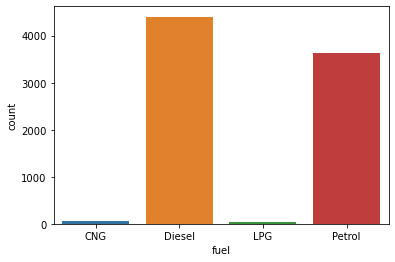

In [83]:
sns.countplot(x="fuel",data=df)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

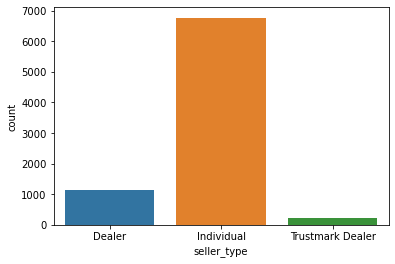

In [84]:
sns.countplot(x="seller_type",data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

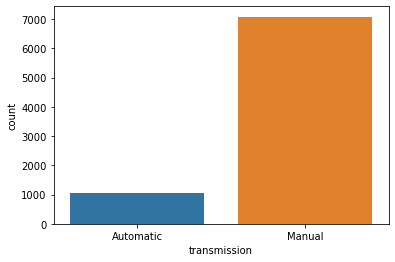

In [85]:
sns.countplot(x="transmission",data=df)

<AxesSubplot:xlabel='owner', ylabel='count'>

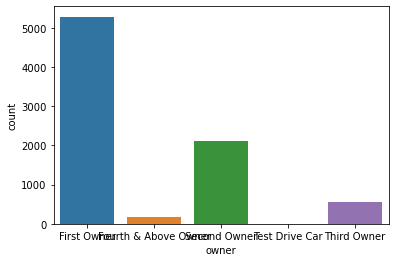

In [86]:
sns.countplot(x="owner",data=df)

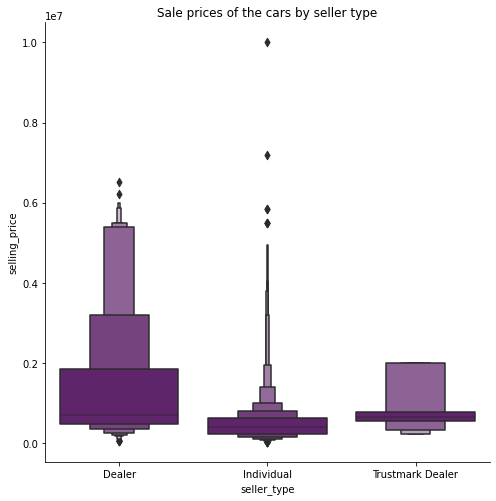

In [87]:
sns.catplot(x = "seller_type",
            y = "selling_price",
            kind = "boxen",
            height = 7,
            aspect = 1,
            color = "#671A76",
            data = df).set(title = "Sale prices of the cars by seller type");

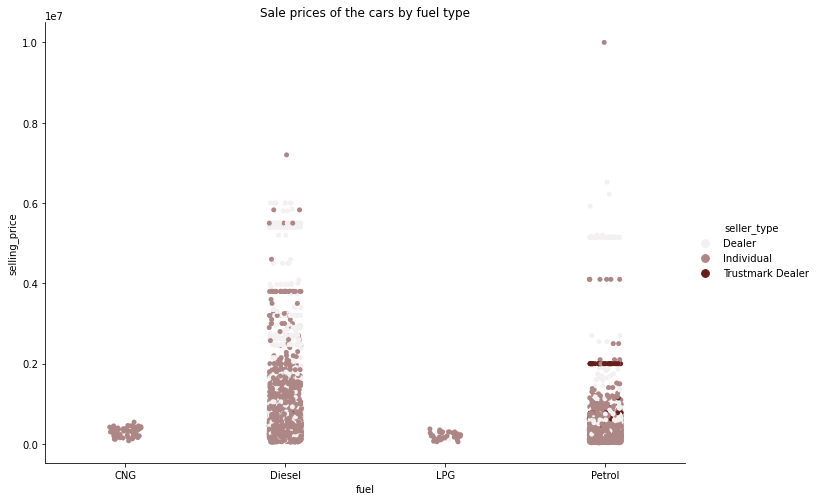

In [88]:
sns.catplot(x = "fuel",
            y = "selling_price",
            kind = "strip",
            hue = "seller_type",
            height = 7,
            aspect = 1.4,
            color = "#661E1D",
            data = df).set(title = "Sale prices of the cars by fuel type");

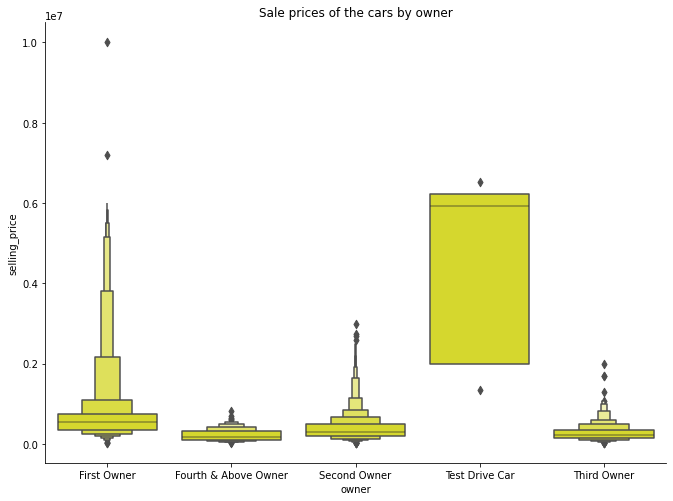

In [89]:
sns.catplot(x = "owner",
            y = "selling_price",
            kind = "boxen",
            height = 7,
            aspect = 1.35,
            color = "#F0F312",
            data = df).set(title = "Sale prices of the cars by owner");

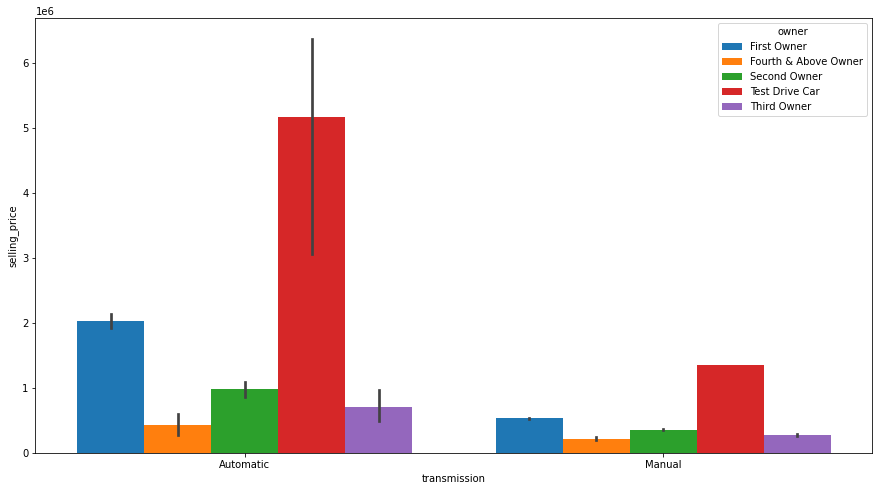

In [90]:
plt.figure(figsize = (15, 8))
sns.barplot(x = "transmission", y = "selling_price", hue = "owner", data = df, saturation = 1);

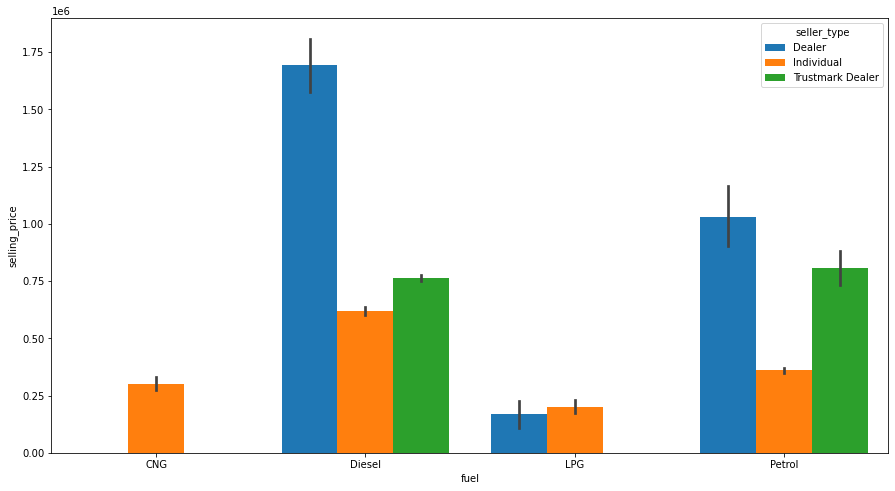

In [91]:
plt.figure(figsize = (15, 8))
sns.barplot(x = "fuel", y = "selling_price", hue = "seller_type", data = df, saturation = 1);

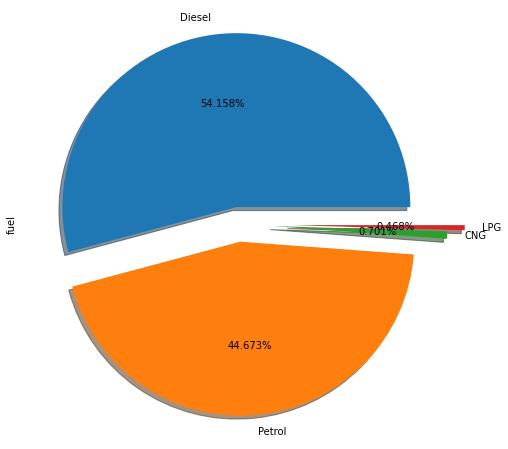

In [92]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#FFFFFF")
df["fuel"].value_counts().plot.pie(explode = [0.1, 0.1, 0.2, 0.3], autopct='%1.3f%%', shadow = True);

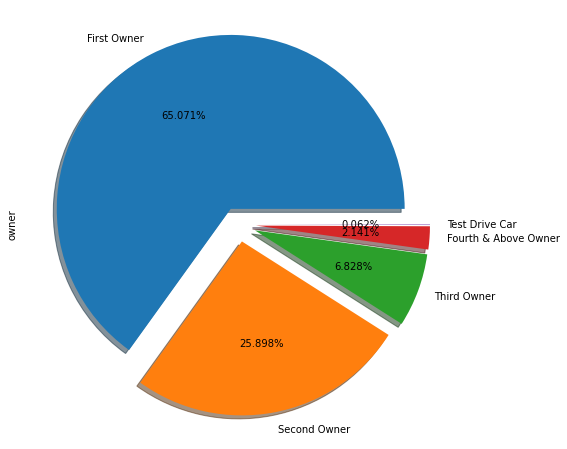

In [93]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#FFFFFF")
df["owner"].value_counts().plot.pie(explode = [0.1, 0.1, 0.1, 0.1, 0.1], autopct='%1.3f%%', shadow = True);

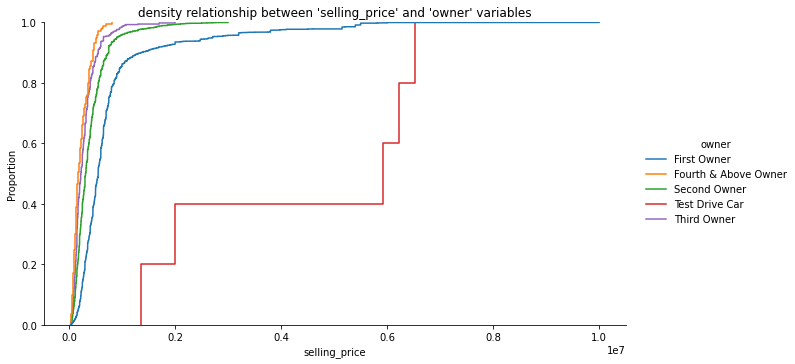

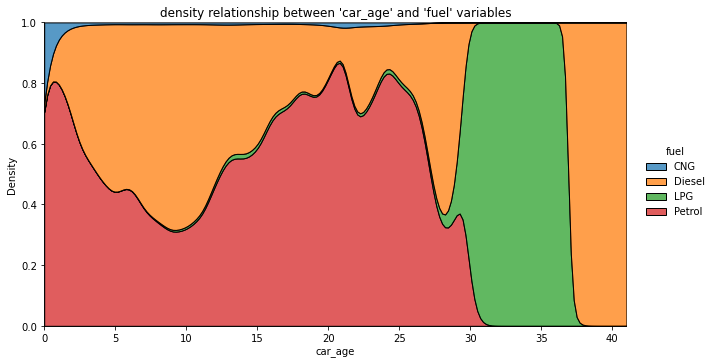

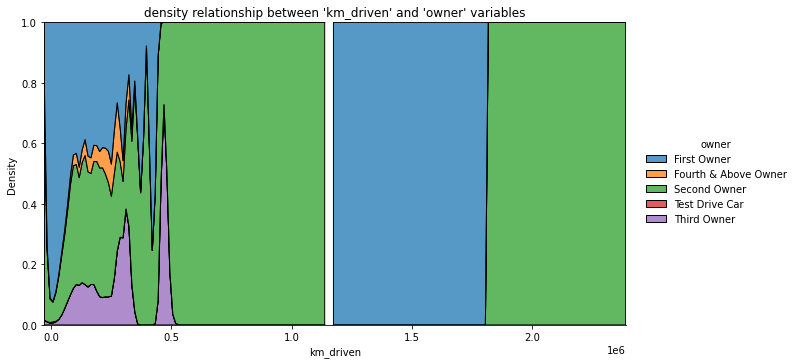

In [94]:
sns.displot(
    data = df, x = "selling_price", hue = "owner",
    kind = "ecdf", height = 5, aspect = 1.8).set(title =  "density relationship between 'selling_price' and 'owner' variables");

sns.displot(
    data = df, x = "car_age", hue = "fuel",
    kind = "kde", height = 5, aspect = 1.8, multiple="fill").set(title = "density relationship between 'car_age' and 'fuel' variables");

sns.displot(
    data = df, x = "km_driven", hue = "owner",
    kind = "kde", height = 5, aspect = 1.8, multiple="fill").set(title = "density relationship between 'km_driven' and 'owner' variables");

## Converting categorical values to numeric values

In [95]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [96]:
df.head(10)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,1,1,0,0,23.40,1248.0,74.00,5.0,Maruti,8
1,370000,120000,1,1,0,1,21.14,1498.0,103.52,5.0,Skoda,8
2,158000,140000,0,1,0,2,17.70,1497.0,78.00,5.0,Honda,16
3,225000,127000,1,1,0,0,23.00,1396.0,90.00,5.0,Hyundai,12
4,130000,120000,0,1,0,0,16.10,1298.0,88.20,5.0,Maruti,15
5,440000,45000,0,1,0,0,20.14,1197.0,81.86,5.0,Hyundai,5
6,96000,175000,3,1,0,0,17.30,1061.0,57.50,5.0,Maruti,15
7,45000,5000,0,1,0,1,16.10,796.0,37.00,4.0,Maruti,21
8,350000,90000,1,1,0,0,23.59,1364.0,67.10,5.0,Toyota,11
9,200000,169000,1,1,0,0,20.00,1399.0,68.10,5.0,Ford,9


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   selling_price   8128 non-null   int64   
 1   km_driven       8128 non-null   int64   
 2   fuel            8128 non-null   category
 3   seller_type     8128 non-null   category
 4   transmission    8128 non-null   category
 5   owner           8128 non-null   category
 6   mileage         7907 non-null   float64 
 7   engine          7907 non-null   float64 
 8   max_power       7912 non-null   float64 
 9   seats           7907 non-null   float64 
 10  car_brand_name  8128 non-null   category
 11  car_age         8128 non-null   int64   
dtypes: category(5), float64(4), int64(3)
memory usage: 486.3 KB


In [98]:
df.drop(['car_brand_name'],axis=1,inplace=True)

## Removing missing values

In [105]:
df["mileage"]=df["mileage"].replace(to_replace="0",value=np.nan)
df["mileage"]=df["mileage"].astype(float)

median=df["mileage"].median()
median

df["mileage"].replace(np.nan,median,inplace=True)

In [106]:
df["engine"]=df["engine"].replace(to_replace="0",value=np.nan)
df["engine"]=df["engine"].astype(float)

median=df["engine"].median()
median

df["engine"].replace(np.nan,median,inplace=True)

In [107]:
df["max_power"]=df["max_power"].replace(to_replace="0",value=np.nan)
df["max_power"]=df["max_power"].astype(float)

median=df["max_power"].median()
median

df["max_power"].replace(np.nan,median,inplace=True)

In [108]:
df["seats"]=df["seats"].replace(to_replace="0",value=np.nan)
df["seats"]=df["seats"].astype(float)

median=df["seats"].median()
median

df["seats"].replace(np.nan,median,inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   selling_price  8128 non-null   int64   
 1   km_driven      8128 non-null   int64   
 2   fuel           8128 non-null   category
 3   seller_type    8128 non-null   category
 4   transmission   8128 non-null   category
 5   owner          8128 non-null   category
 6   mileage        8128 non-null   float64 
 7   engine         8128 non-null   float64 
 8   max_power      8128 non-null   float64 
 9   seats          8128 non-null   float64 
 10  car_age        8128 non-null   int64   
dtypes: category(4), float64(4), int64(3)
memory usage: 477.0 KB


## Modelling the Data.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [111]:
x=df.drop(['selling_price'],axis=1)
y=df[['selling_price']]

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.11,random_state=4)

In [157]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [158]:
reg.score(x_train,y_train)

0.6814992257016268

In [159]:
reg.score(x_train,y_train)

0.6814992257016268

In [160]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [161]:
NNH =KNeighborsRegressor(n_neighbors=14)
NNH.fit(x_train,y_train)


KNeighborsRegressor(n_neighbors=14)

In [162]:
NNH.score(x_train,y_train)

0.7730530829744753

In [163]:
NNH.score(x_test,y_test)

0.8234180841159855

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [165]:
a= DecisionTreeRegressor()

In [167]:
a.fit(x_train,y_train)

DecisionTreeRegressor()

In [168]:
a.score(x_train,y_train)

0.9996312033105411

In [170]:
a.score(x_test,y_test)

0.9999132569024699